## Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.subplots as sp

## Reading playlist attribute data CSV file  

In [2]:
dfOriginal = pd.read_csv('playlist_data.csv')
# playlist link: https://open.spotify.com/playlist/5Rrf7mqN8uus2AaQQQNdc1?si=6bfa43c85b9a465f
# playlist attribute data extracted using: https://skiley.net/ 
dfOriginal.head()

Name              Artist  \
0                               Like a Rolling Stone           Bob Dylan   
1  (I Can't Get No) Satisfaction - Mono Version /...  The Rolling Stones   
2                          Imagine - Remastered 2010         John Lennon   
3                                        Purple Rain              Prince   
4                                    What's Going On         Marvin Gaye   

  Duration  Acousticness  Danceability  Energy  Instrumentalness  Liveness  \
0     6:09        0.7310         0.482   0.721          0.000000    0.1890   
1     3:42        0.0354         0.722   0.882          0.049600    0.1190   
2     3:07        0.9070         0.547   0.257          0.183000    0.0935   
3     8:40        0.0353         0.367   0.452          0.002280    0.6890   
4     3:53        0.4030         0.280   0.720          0.000001    0.3940   

   Loudness  Speechiness    Tempo  Valence  
0    -6.839       0.0321   95.263    0.557  
1    -6.763       0.0348  136.299    0.921  
2   -12.358       0.0252   75.752    0.169  
3   -10.422       0.0307  113.066    0.189  
4    -9.668       0.1110  202.523    0.805

## Creating a dataframe only of the attributes of tracks

In [3]:
df = dfOriginal.drop(dfOriginal[['Name','Artist','Duration']],axis = 1,inplace=False)
df.head()


Acousticness  Danceability  Energy  Instrumentalness  Liveness  Loudness  \
0        0.7310         0.482   0.721          0.000000    0.1890    -6.839   
1        0.0354         0.722   0.882          0.049600    0.1190    -6.763   
2        0.9070         0.547   0.257          0.183000    0.0935   -12.358   
3        0.0353         0.367   0.452          0.002280    0.6890   -10.422   
4        0.4030         0.280   0.720          0.000001    0.3940    -9.668   

   Speechiness    Tempo  Valence  
0       0.0321   95.263    0.557  
1       0.0348  136.299    0.921  
2       0.0252   75.752    0.169  
3       0.0307  113.066    0.189  
4       0.1110  202.523    0.805

## Tempo and Loudness are the only variables whose values are not between 0 and 1

In [4]:
df.drop(['Tempo','Loudness'],axis=1, inplace =False).describe().loc[['min','max']]

Acousticness  Danceability  Energy  Instrumentalness  Liveness  \
min      0.000016         0.184  0.0338             0.000    0.0273   
max      0.989000         0.947  0.9800             0.949    0.9860   

     Speechiness  Valence  
min       0.0239   0.0574  
max       0.4050   0.9870

In [5]:
df[['Tempo','Loudness']].describe().loc[['min','max']]

Tempo  Loudness
min   63.993   -20.567
max  205.981     0.878

## Standardizing with MinMaxScaler()

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1)) 
df['Tempo_scaled']=scaler.fit_transform(df[['Tempo']])
df['Loudness_scaled']=scaler.fit_transform(df[['Loudness']])
df[['Tempo','Tempo_scaled','Loudness','Loudness_scaled']].head()

Tempo  Tempo_scaled  Loudness  Loudness_scaled
0   95.263      0.220230    -6.839         0.640149
1  136.299      0.509240    -6.763         0.643693
2   75.752      0.082817   -12.358         0.382793
3  113.066      0.345614   -10.422         0.473071
4  202.523      0.975646    -9.668         0.508230

In [7]:
df.drop(['Tempo','Loudness'],axis=1,inplace=True)

In [8]:
df.head()

Acousticness  Danceability  Energy  Instrumentalness  Liveness  \
0        0.7310         0.482   0.721          0.000000    0.1890   
1        0.0354         0.722   0.882          0.049600    0.1190   
2        0.9070         0.547   0.257          0.183000    0.0935   
3        0.0353         0.367   0.452          0.002280    0.6890   
4        0.4030         0.280   0.720          0.000001    0.3940   

   Speechiness  Valence  Tempo_scaled  Loudness_scaled  
0       0.0321    0.557      0.220230         0.640149  
1       0.0348    0.921      0.509240         0.643693  
2       0.0252    0.169      0.082817         0.382793  
3       0.0307    0.189      0.345614         0.473071  
4       0.1110    0.805      0.975646         0.508230

## Principal Component Analysis (PCA) decomposition
To visualize data in scatter plot and make, we reduce the dataframe into two dimensions

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_2d = pca.fit_transform(df)

 ## Finding Sum of Squared Errors(SSE) for K-means algorithm

In [10]:
from sklearn.cluster import KMeans
sse=[]
for k in range(1, 15):
    km = KMeans(n_clusters=k)
    km.fit(df_2d)
    sse.append(km.inertia_)
sse

[92.96418183344237,
 49.80455031755295,
 34.42725195023031,
 24.87928729555541,
 20.917956205384733,
 17.05268551551159,
 15.389465695839075,
 14.147041315247664,
 11.79327194341662,
 10.186772843980194,
 9.331572544678657,
 8.619792037780911,
 7.942055334714238,
 7.30127292275079]

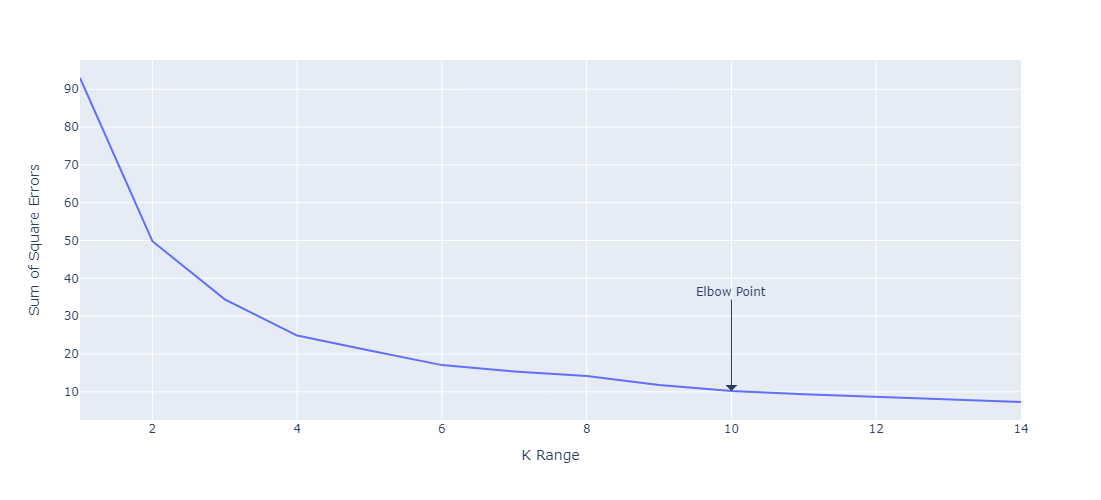

In [76]:
px.line(x=range(1,15),y=sse).update_layout(xaxis_title="K Range",yaxis_title="Sum of Square Errors",height=500,width=700).add_annotation(
    x=10,y=10.2,showarrow=True,arrowhead=1,arrowsize=2,ax=0,ay=-100,text="Elbow Point")
                                        

 #####                     From above graph, we take no. of clusters as 10

#

In [12]:
km =KMeans(n_clusters=10)
km.fit(df)

KMeans(n_clusters=10)

In [13]:
y_predicted = km.predict(df).astype(str)
print(y_predicted[:10])

['3' '0' '4' '9' '3' '0' '9' '9' '2' '3']


## Generating clusters for reduced dataframe with K-Means algorithm

In [14]:
km = KMeans(n_clusters=10,random_state=42)
clusters = km.fit_predict(df_2d)
print(clusters[:10])

[9 5 6 8 0 4 3 3 4 4]


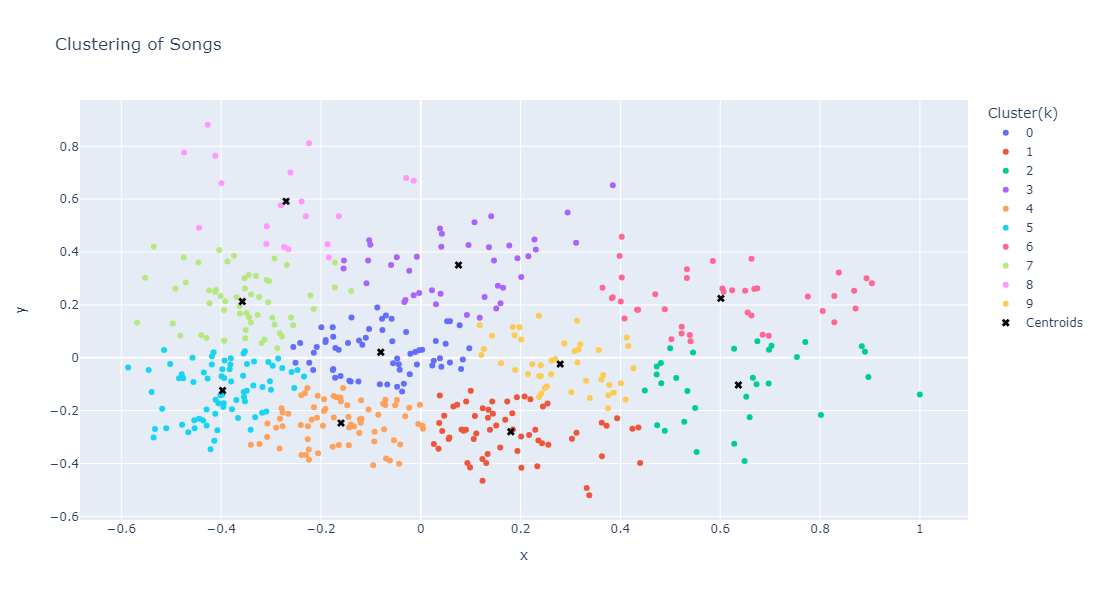

In [16]:
df_clusters = pd.DataFrame({'x': df_2d[:, 0], 'y': df_2d[:, 1], 'Cluster(k)': clusters.astype(str)})
# Creating a df sorted by cluster no. so it is labeled ascendingly in scatter plot 
df_clusters_sorted = df_clusters.sort_values(by=['Cluster(k)'])

#Plotting the df and also centroids evaluated by k-means algorithm
fig_cluster=px.scatter(df_clusters_sorted,x='x',y='y',color='Cluster(k)',title = "Clustering of Songs",height=600,width=800)
fig_cluster.add_scatter(x=km.cluster_centers_[:,0],y=km.cluster_centers_[:,1],mode='markers',name='Centroids',marker=dict(color='Black',size=7,symbol='x'))
fig_cluster.show()


## Grouping the tracks with their respective clusters 

In [25]:
dfGrouped = dfOriginal.copy()
dfGrouped['Cluster'] = clusters
dfGrouped.head()

Name              Artist  \
0                               Like a Rolling Stone           Bob Dylan   
1  (I Can't Get No) Satisfaction - Mono Version /...  The Rolling Stones   
2                          Imagine - Remastered 2010         John Lennon   
3                                        Purple Rain              Prince   
4                                    What's Going On         Marvin Gaye   

  Duration  Acousticness  Danceability  Energy  Instrumentalness  Liveness  \
0     6:09        0.7310         0.482   0.721          0.000000    0.1890   
1     3:42        0.0354         0.722   0.882          0.049600    0.1190   
2     3:07        0.9070         0.547   0.257          0.183000    0.0935   
3     8:40        0.0353         0.367   0.452          0.002280    0.6890   
4     3:53        0.4030         0.280   0.720          0.000001    0.3940   

   Loudness  Speechiness    Tempo  Valence  Cluster  
0    -6.839       0.0321   95.263    0.557        9  
1    -6.763       0.0348  136.299    0.921        5  
2   -12.358       0.0252   75.752    0.169        6  
3   -10.422       0.0307  113.066    0.189        8  
4    -9.668       0.1110  202.523    0.805        0

In [41]:
dfGrouped.loc[dfGrouped['Cluster']==8].describe()

Acousticness  Danceability     Energy  Instrumentalness   Liveness  \
count     19.000000     19.000000  19.000000         19.000000  19.000000   
mean       0.078554      0.337368   0.841368          0.099990   0.613168   
std        0.108224      0.104241   0.144556          0.231895   0.361308   
min        0.000026      0.217000   0.452000          0.000000   0.083200   
25%        0.003900      0.276500   0.753500          0.000103   0.210000   
50%        0.034200      0.306000   0.905000          0.006040   0.676000   
75%        0.080150      0.362000   0.939500          0.057150   0.969000   
max        0.324000      0.601000   0.980000          0.791000   0.986000   

        Loudness  Speechiness       Tempo    Valence  Cluster  
count  19.000000    19.000000   19.000000  19.000000     19.0  
mean   -7.061474     0.079005  137.449579   0.272737      8.0  
std     2.845221     0.041221   25.266186   0.081773      0.0  
min   -11.918000     0.030400   96.950000   0.113000      8.0  
25%    -8.639000     0.041000  119.337000   0.210000      8.0  
50%    -7.556000     0.075200  134.184000   0.262000      8.0  
75%    -6.013500     0.107500  157.816500   0.336000      8.0  
max     0.878000     0.184000  176.343000   0.430000      8.0